In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("heart data for pca practice.csv")
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
le= LabelEncoder()
cathegorical_cols=['Sex','ChestPainType','ExerciseAngina','ST_Slope','RestingECG']
for col in cathegorical_cols:
    df[col]=le.fit_transform(df[col])

In [5]:
X=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
model= XGBClassifier(use_label_encoder='False',eval_metric='logloss')
model.fit(X_train,y_train)

C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
y_pred=model.predict(X_test)

In [9]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8695652173913043
[[69  8]
 [16 91]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



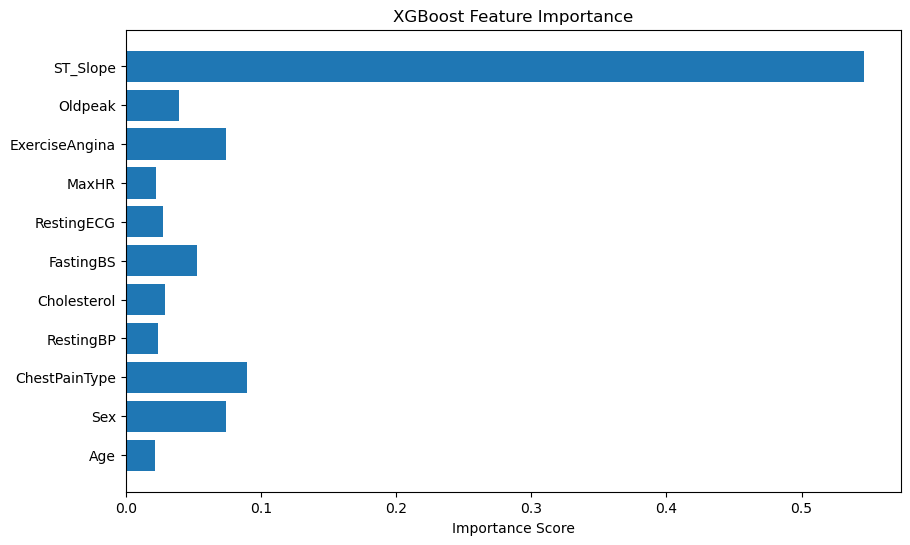

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()


In [11]:
parm_grid={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,4,5,7,8],
    'learning_rate':[0.01,0.03,0.01,0.03],
    'subsample':[0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1.0]
}


    


In [12]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model=XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='logloss')
random_search= RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=parm_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train,y_train)
                        
                        

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.01,
                                                          0.03],
                                        'max_depth': [3, 4, 5, 7, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [13]:
print(random_search.best_params_)


{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [14]:
xgb_tuned=XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.7,
    random_state=42
)
xgb_tuned.fit(X_train,y_train)


    


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred=xgb_tuned.predict(X_test)

In [16]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8804347826086957
[[67 10]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
xgb=XGBClassifier(use_label_encoder=False,eval_mertric='logloss',random_state=42)

In [19]:
parm_grid={
    'n_estimators':[200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}

In [20]:
grid_search=GridSearchCV(
    estimator=xgb,
    param_grid= parm_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)
    

In [21]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_mertric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_mertric='logloss', eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [22]:
best_model=grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
0.8841363519466479


In [23]:
final_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

final_model.fit(X_train, y_train)


C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8804347826086957
[[67 10]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

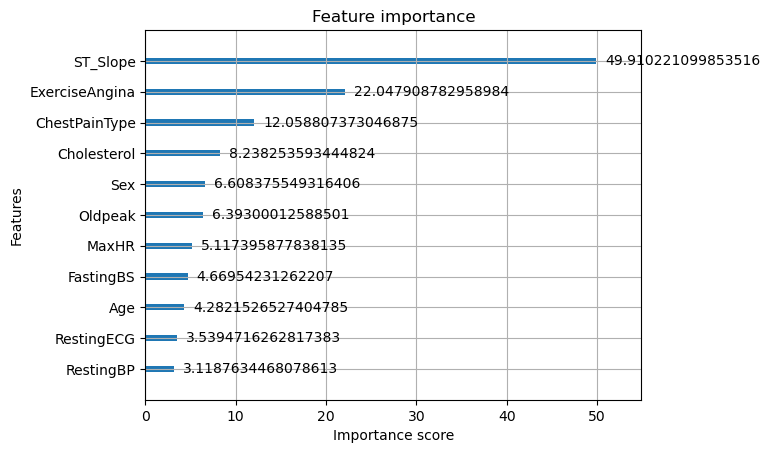

In [26]:
plot_importance(final_model,importance_type= 'gain',max_num_features=20)
plt.show()

In [27]:
importance=final_model.get_booster().get_score(importance_type='gain')
importance_df= pd.DataFrame(importance.items(),columns=['Feature','gain'])
importance_df=importance_df.sort_values(by='gain',ascending=False).reset_index(drop=True)
importance_df.to_csv("feature_importtant_gain.csv",index=False) 

In [28]:
importance_df.head(10)

,Feature,gain
0,ST_Slope,49.910221
1,ExerciseAngina,22.047909
2,ChestPainType,12.058807
3,Cholesterol,8.238254
4,Sex,6.608376
5,Oldpeak,6.393000
6,MaxHR,5.117396
7,FastingBS,4.669542
8,Age,4.282153
9,RestingECG,3.539472


| Rank | Feature                     | Why it's Important                                            |
| ---- | --------------------------- | ------------------------------------------------------------- |
| 1    | **ST\_Slope**               | Direct ECG signal of ischemia—strongest diagnostic marker     |
| 2    | **ExerciseAngina**          | Real-time stress symptom—highly specific to cardiac function  |
| 3    | **ChestPainType**           | Detailed pain classification—captures clinical presentation   |
| 4–7  | Cholesterol, Oldpeak, MaxHR | Mix of background and test-based signals—not as precise       |
| 8–10 | Age, FastingBS, RestingECG  | Risk factors or indirect indicators—less useful for splitting |



In [30]:
from sklearn.feature_selection import RFE
madal= XGBClassifier(random_state=42, eval_metric='logloss')

In [31]:
for k in range(1,X.shape[1]+1):
    rfe=RFE(estimator=madal,n_features_to_select=k)
    rfe.fit(X_train,y_train)

    X_test_rfe= rfe.transform(X_test)
    X_train_rfe= rfe.transform(X_train)

    madal.fit(X_train_rfe,y_train)
    predse=madal.predict(X_test_rfe)

    acc=accuracy_score(y_test,predse)
    print(f"{k} features=> Accuracy:{acc:.4f}")




1 features=> Accuracy:0.7989
2 features=> Accuracy:0.7880
3 features=> Accuracy:0.7935
4 features=> Accuracy:0.8315
5 features=> Accuracy:0.7880
6 features=> Accuracy:0.8424
7 features=> Accuracy:0.7935
8 features=> Accuracy:0.7989
9 features=> Accuracy:0.8587
10 features=> Accuracy:0.8750
11 features=> Accuracy:0.8696


In [32]:
rfe=RFE(estimator=madal,n_features_to_select=10)
rfe.fit(X_train,y_train)
selected_features=X.columns[rfe.support_]
print("top 10 features:",list(selected_features))

top 10 features: ['Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [33]:
X_top10=X[selected_features]
X_train_top10,X_test_top10,y_train,y_test= train_test_split(X_top10,y, test_size=0.2,random_state=42)
final_king=XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
final_king.fit(X_train_top10,y_train)
predict=final_king.predict(X_test_top10)

C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [34]:
print(accuracy_score(y_test,predict))

0.875


In [35]:
parm_dis={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,4,5,6,7,8],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.6,0.8,0.9,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'gamma':[0,0.1,0.2,0.5],
    'reg_alpha':[0,0.1,0.5],
    'reg_lambd':[0.5,1,1.5,2]
}


In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [37]:
xgb_model_1=XGBClassifier(random_state=42,use_label_encoder=False,eval_mertic='logloss')
random_search_top10= RandomizedSearchCV(
    estimator=xgb_model_1,
    param_distributions= parm_dis,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search_top10.fit(X_train_top10,y_train)
best_params = random_search_top10.best_params_  # ← THIS LINE


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_mertic", "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
print(random_search_top10.best_params_)

{'subsample': 1.0, 'reg_lambd': 2, 'reg_alpha': 0.5, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [39]:
Xgb_mass=XGBClassifier(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.01,
    subsample=1.0,
    colsample_bytree=0.6,
    gamma=0.5,
    reg_alpha=0.5,
    reg_lambda=0.5
)
Xgb_mass.fit(X_train_top10,y_train)
    
    

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_p=Xgb_mass.predict(X_test_top10)

In [41]:
print(accuracy_score(y_test,y_p))
print(confusion_matrix(y_test,y_p))
print(classification_report(y_test,y_p))

0.8804347826086957
[[66 11]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [42]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
import numpy as np
xgb_moo=XGBClassifier(**best_params, random_state=42, use_label_encoder=False,eval_metric='logloss')
skf=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
scores=cross_val_score(xgb_moo, X_top10,y,cv=skf,scoring='accuracy')
print(scores)
print(np.mean(scores))

C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "

[0.90217391 0.86956522 0.84782609 0.89617486 0.87431694]
0.8780114041339987


C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


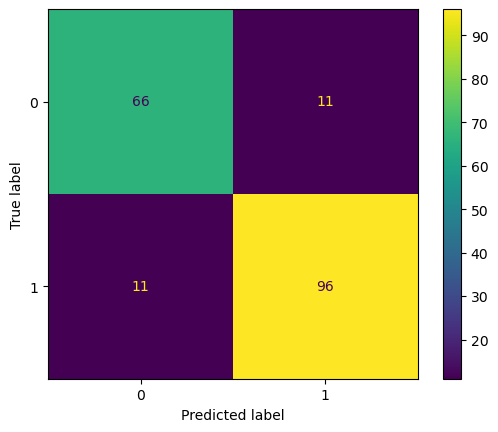

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_p=Xgb_mass.predict(X_test_top10)
# Confusion Matrix
cm = confusion_matrix(y_test,y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Classification Report
print(classification_report(y_test, y_p))


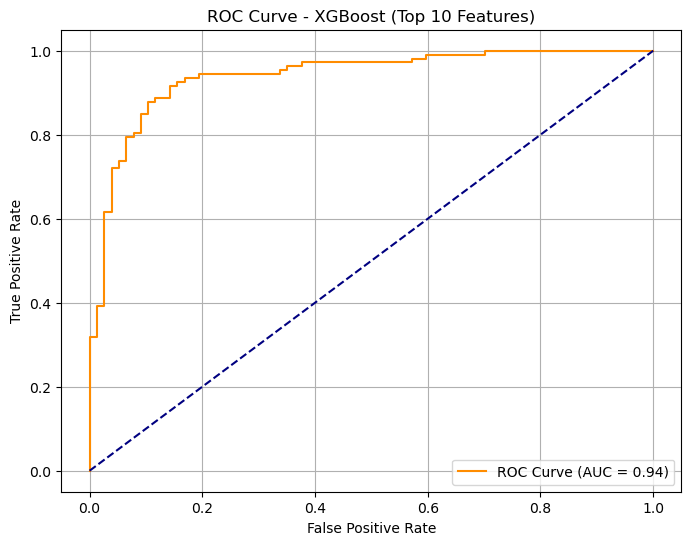

In [44]:
from sklearn.metrics import roc_curve, auc

# Predict PROBABILITIES 
probs = Xgb_mass.predict_proba(X_test_top10)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Top 10 Features)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [89]:
import shap

In [91]:
expliner=shap.Explainer(Xgb_mass, X_top10)
shap_values=expliner(X_top10)

 95%|=================== | 871/918 [00:15<00:00]       

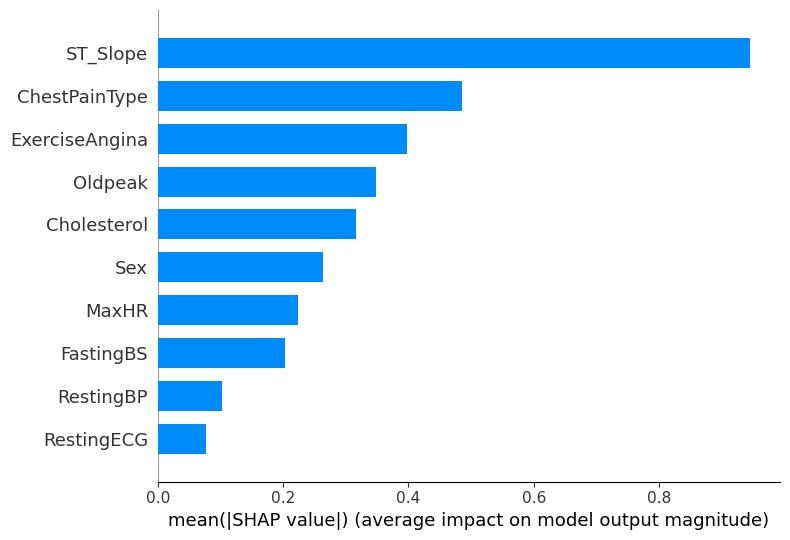

In [93]:
shap.summary_plot(shap_values,X_top10,plot_type='bar')

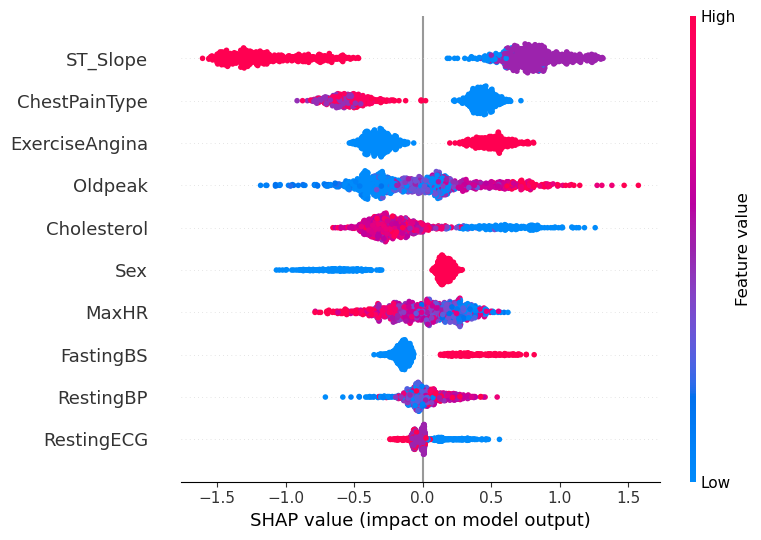

In [95]:
shap.summary_plot(shap_values,X_top10)

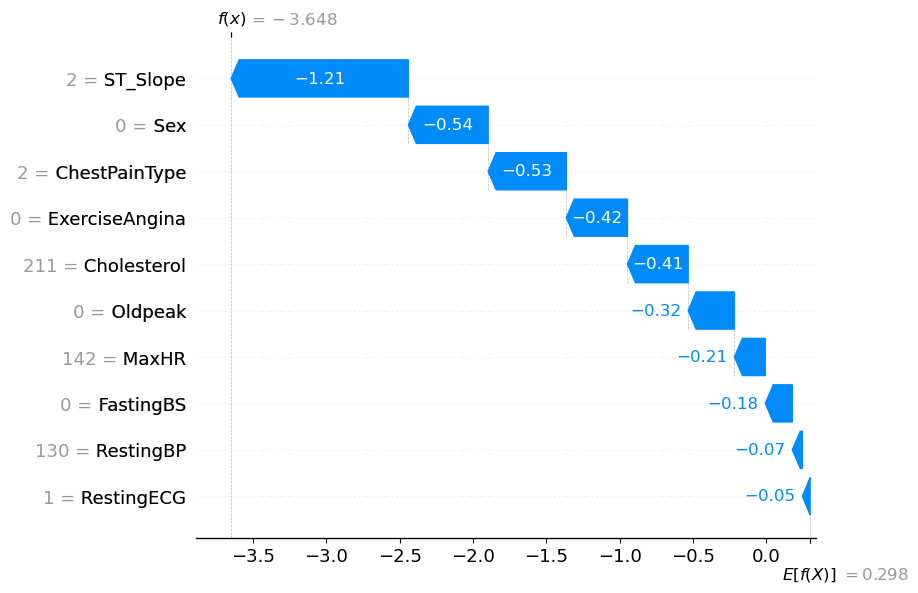

In [115]:
shap.plots.waterfall(shap_values[10])

In [121]:
#voting classifer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [123]:
lr_model= LogisticRegression()
rf_model= RandomForestClassifier()
Xgb_mose= XGBClassifier(**best_params, random_state=42, use_label_encoder=False,eval_metric='logloss')

voting_clf=VotingClassifier(
    estimators=[
        ('lr',lr_model),
        ('rf',rf_model),
        ('xgb',Xgb_mose),
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

C:\Users\balap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=0.5,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [127]:
y_pr= voting_clf.predict(X_test)
print(accuracy_score(y_test,y_pr))

0.8695652173913043


In [131]:
from sklearn.ensemble import StackingClassifier
base_model=[
    ('rf',RandomForestClassifier()),
    ('lr',LogisticRegression()),
    ('xgb',XGBClassifier(**best_params, random_state=42, use_label_encoder=False,eval_metric='logloss'))
]
meta_model=LogisticRegression()

stacking_clf= StackingClassifier(
    estimators=base_model,
    final_estimator=meta_model,
    passthrough=True
)
stacking_clf.fit(X_train,y_train)
    

    

C:\Users\balap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balap\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:38:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "reg_lambd", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\balap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, ga...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=400, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [135]:
y_=stacking_clf.predict(X_test)
print(accuracy_score(y_test,y_))

0.8586956521739131
